In [1]:
import requests

from IPython.display import display, HTML

In [2]:
# 下载素材
def get_img(url):
    filename = url.split("/")[-1]
    response = requests.get(url)
    if response.status_code == 200:
        with open("img/"+filename, 'wb') as file:
            file.write(response.content)
        print(f"图片已成功保存到 {filename}")
    else:
        print(f"下载失败，状态码: {response.status_code}")


In [ ]:
# 循环下载
for i in range(18):
    url = f"https://xxxxx.com/cover{i}.png"
    print(url)
    get_img(url)

In [7]:
import os

def rename_images(folder_path):
    # 检查文件夹是否存在
    if not os.path.exists(folder_path):
        print(f"文件夹 '{folder_path}' 不存在")
        return

    # 获取文件夹中的所有图片文件
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # 对图片文件进行排序
    image_files.sort()

    # 重命名图片文件
    for i, file_name in enumerate(image_files):
        new_name = f"{i:02d}.png"
        os.rename(os.path.join(folder_path, file_name), os.path.join(folder_path, new_name))

    print("文件重命名完成")

# 使用示例
folder_path = "./img"  # 替换为你的文件夹路径
rename_images(folder_path)


文件重命名完成


In [10]:
from PIL import Image
import os

def resize_images(folder_path):
    # 检查文件夹是否存在
    if not os.path.exists(folder_path):
        print(f"文件夹 '{folder_path}' 不存在")
        return

    # 获取文件夹中的所有图片文件
    image_files = [f for f in os.listdir(folder_path) if f.endswith(('.png', '.jpg', '.jpeg', '.gif'))]

    # 遍历并调整图片尺寸
    for file_name in image_files:
        file_path = os.path.join(folder_path, file_name)
        try:
            # 打开图片
            image = Image.open(file_path)
            # 调整尺寸为 700x700
            resized_image = image.resize((700, 700))
            # 保存覆盖原文件
            resized_image.save(file_path)
            print(f"{file_name} 调整尺寸成功")
        except Exception as e:
            print(f"{file_name} 调整尺寸失败: {str(e)}")

# 使用示例
folder_path = "img"  # 替换为你的文件夹路径
resize_images(folder_path)


00.png 调整尺寸成功
01.png 调整尺寸成功
02.png 调整尺寸成功
03.png 调整尺寸成功
04.png 调整尺寸成功
05.png 调整尺寸成功
06.png 调整尺寸成功
07.png 调整尺寸成功
08.png 调整尺寸成功
09.png 调整尺寸成功
10.png 调整尺寸成功
11.png 调整尺寸成功
12.png 调整尺寸成功


原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)
原图片尺寸： (640, 640)


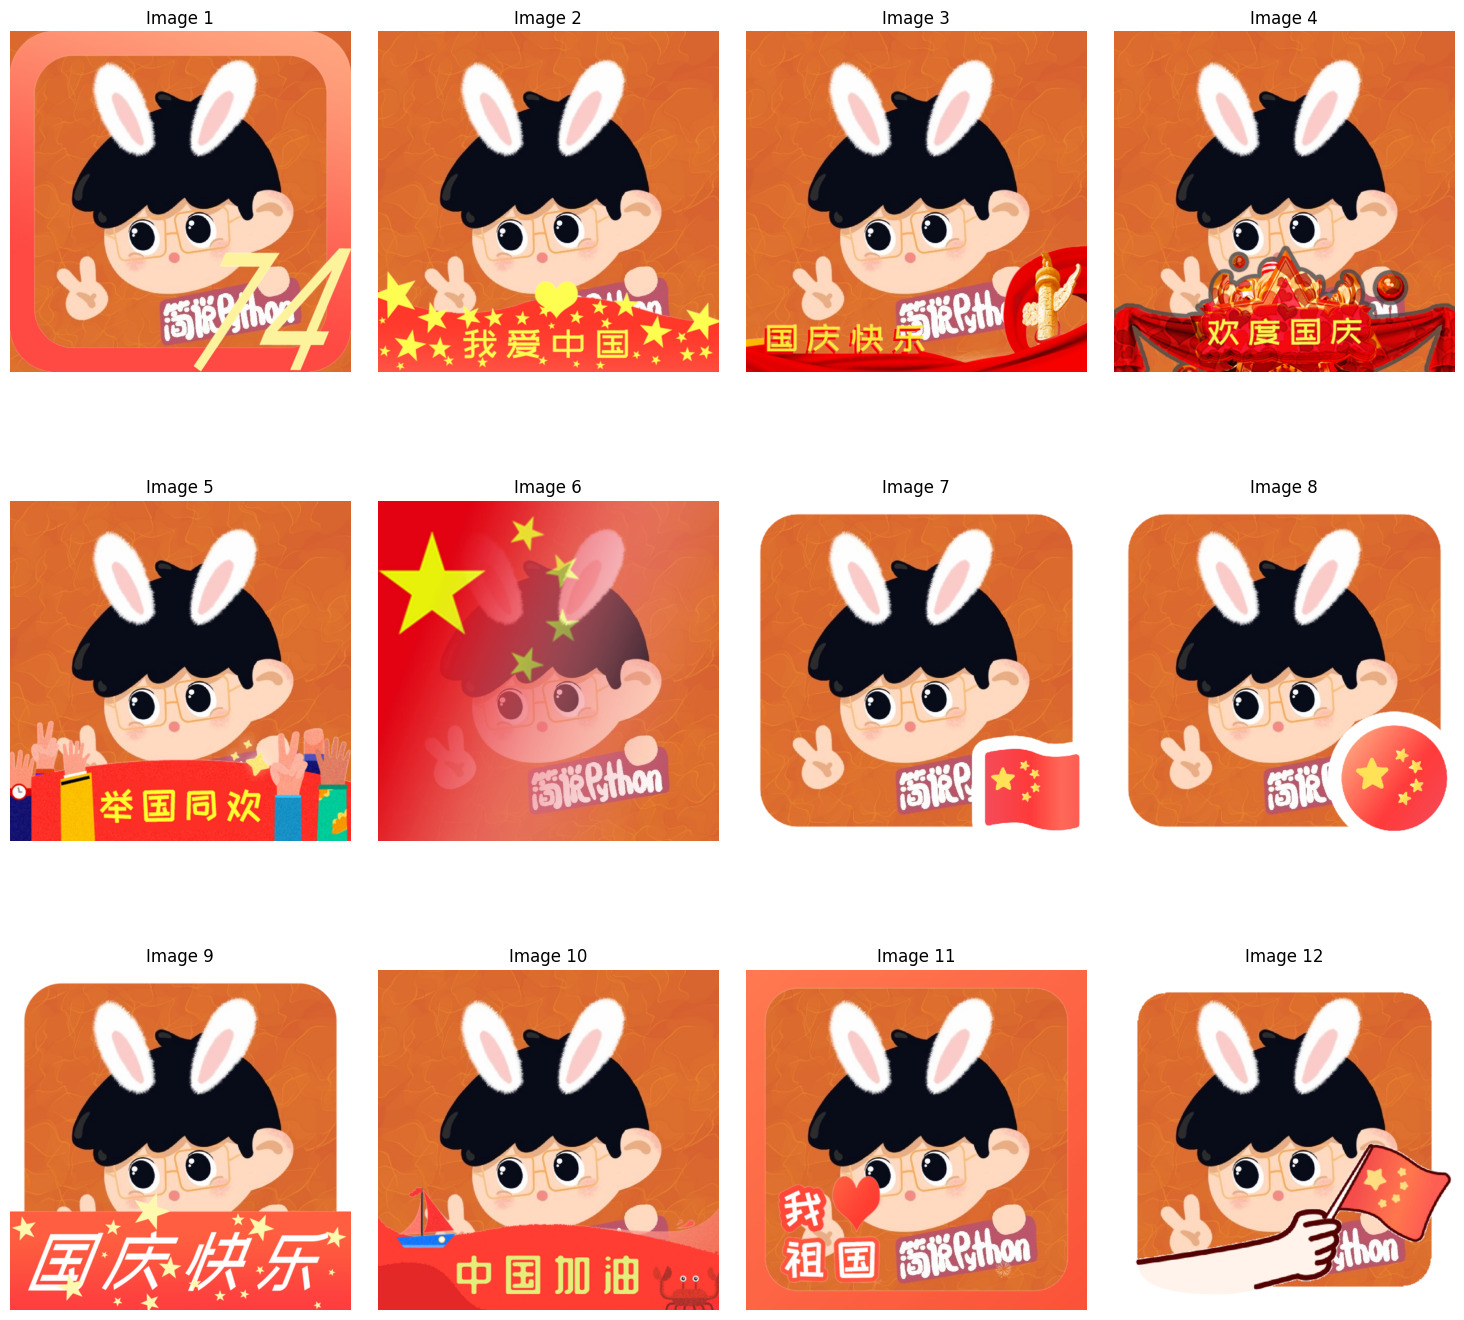

In [3]:
# -*- coding: utf-8 -*-
"""
@author = 老表
@date = 2019-09-24
@last = 2023-09-25
@个人公众号 : 简说Python
"""


from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

"""
需求：给图片右下角添加中国国旗
欢迎国庆，喜庆74周年
"""

# 图片合并
def handle_picture(style="01", avatar="./wechat.jpg"):
    '''
    style : 模板文件名称，我是以序号命名的
    avatar : 微信头像文件路径
    '''
    # 打开图片模版
    img1 = Image.open(f"./img/{style}.png")
    img1 = img1.convert('RGBA')
    # 打开原来的微信头像
    img2 = Image.open(avatar)
    img2 = img2.convert('RGBA')
    if img1.size > img2.size:  # 判断图片大小，统一改为 size 小的尺寸
        # 修改图片尺寸
        size = img2.size
        img1.thumbnail(size)
    else:
        # 修改图片尺寸
        size = img1.size
        img2.thumbnail(size)
    # 图片粘贴选区
    loc = (0, 0) + size
    # 将img1 粘贴到 img2
    img2.paste(img1, loc, img1)
    img2.save(f"output/new_{style}.png")   # 保存生成的头像图片
    return img2


# 图片显示
def display_images(images_list, images_per_row=4, pixel_spacing=2):
    num_images = len(images_list)
    # 计算图片显示行数
    num_rows = (num_images + images_per_row - 1) // images_per_row
    
    fig, axes = plt.subplots(num_rows, images_per_row, figsize=(15, 15))
    axes = axes.flatten()
    
    for i, image in enumerate(images_list):
        axes[i].imshow(np.asarray(image))
        axes[i].axis('off')
        axes[i].set_title(f'Image {i+1}')
        
    # 隐藏多余的子图
    for j in range(num_images, len(axes)):
        fig.delaxes(axes[j])
    
    plt.tight_layout(pad=pixel_spacing)
    plt.show()


images = []
for i in range(12):
    if i < 10:
        i = f"0{i}"
    images.append(handle_picture(i))

# 调用函数来显示图片
display_images(images, images_per_row=4, pixel_spacing=2)